# Import backage

In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from exp.sir.train import train
from models_new import Renorm_Dynamic
from exp.sir.dynamic_models_sis_new import Simple_Spring_Model
from datetime import datetime
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [3]:
mul_batch_size = [0,5000,3000,1000]#[0,10,4500,1500]
sigma = 0.03
rou = -0.5
steps = 7
dt = 0.01

seed = 2050
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
spring = Simple_Spring_Model(device=device)
test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt) 
train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt)

# Train NIS

In [4]:
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 3001
eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis, net_nis = train(train_data=train_data, test_data=test_data, 
                                                                    sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                    mae2_w=mae2_w, dt=dt, T1=2001, T2=T_total,framework='nis')

check point-------o_0-> 13:14:20.639397; lasting 0:01:06.603626 seconds
Epoch: 0
Train loss: 0.4628
dEI: 0.8911
term1: 0.3580
term2: 1.4241
Test multistep loss: 0.5106
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 13:14:25.145908; lasting 0:00:04.506511 seconds
check point-------o_0-> 13:14:30.907383; lasting 0:00:05.761475 seconds
Epoch: 500
Train loss: 0.1100
dEI: 0.9796
term1: 0.6550
term2: 1.3041
Test multistep loss: 0.1065
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 13:14:35.743912; lasting 0:00:04.836529 seconds
check point-------o_0-> 13:14:41.507495; lasting 0:00:05.763583 seconds
Epoch: 1000
Train loss: 0.0374
dEI: 1.6771
term1: 2.0423
term2: 1.3120
Test multistep loss: 0.0363
---------------------------------------------------------------------------------------------------------

# Train NIS+

In [5]:
eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp, net_nisp = train(train_data=train_data, test_data=test_data, 
                                                                         sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                         mae2_w=mae2_w, dt=dt, T1=2001, T2=T_total,framework='nis+')

check point-------o_0-> 13:15:55.310504; lasting 0:00:00.056773 seconds
Epoch: 0
Train loss: 0.4702
dEI: 0.8914
term1: 0.3577
term2: 1.4250
Test multistep loss: 0.4916
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 13:16:00.163298; lasting 0:00:04.852794 seconds
check point-------o_0-> 13:16:10.988179; lasting 0:00:10.824881 seconds
Epoch: 500
Train loss: 0.1071
dEI: 0.9945
term1: 0.6871
term2: 1.3020
Test multistep loss: 0.1064
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 13:16:15.801913; lasting 0:00:04.813734 seconds
check point-------w_0-> 13:16:26.703300; lasting 0:00:10.901387 seconds
check point-------w_1-> 13:16:26.716117; lasting 0:00:00.012817 seconds
check point-------w_2-> 13:19:28.900443; lasting 0:03:02.184326 seconds
check point-------w_3-> 13:19:28.935975; lasting 0:00:00.035

# Results

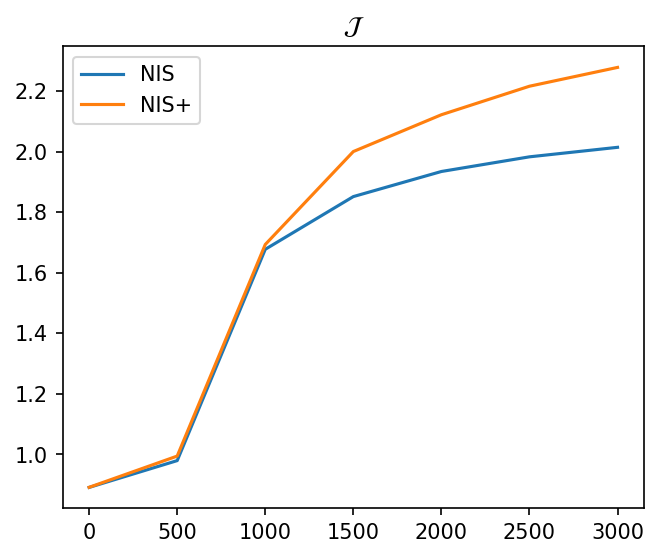

In [6]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, eis_nis, label='NIS')
plt.plot(timeseries, eis_nisp, label='NIS+')
plt.title(r'$\mathcal{J}$')
plt.legend()
plt.show()

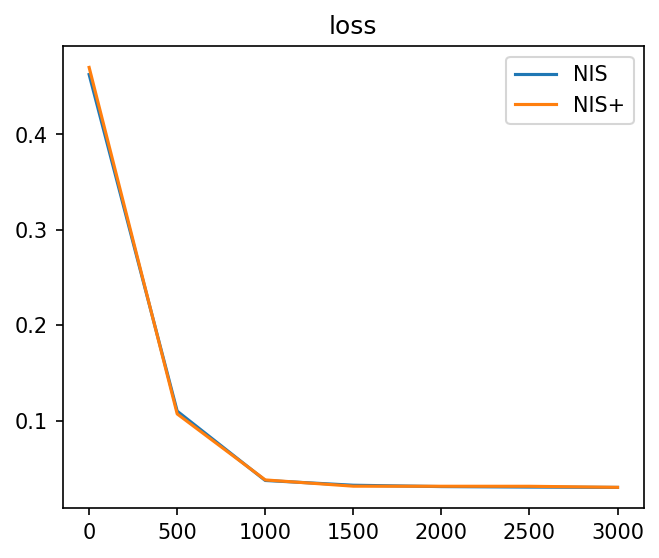

In [7]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, losses_nis, label='NIS')
plt.plot(timeseries, losses_nisp, label='NIS+')
plt.title(r'loss')
plt.legend()
#plt.yscale('log')
plt.show()

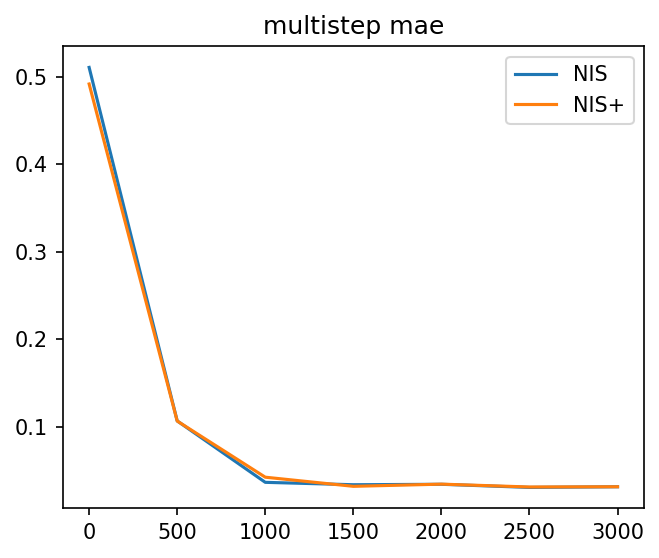

In [8]:
plt.figure(figsize=(5,4),dpi=150)
timeseries = np.arange(len(eis_nis))*500
plt.plot(timeseries, MAEs_mstep_nis, label='NIS')
plt.plot(timeseries, MAEs_mstep_nisp, label='NIS+')
plt.title(r'multistep mae')
plt.legend()
plt.show()